In [1]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests
import os

In [2]:
!mkdir pan_card_tempering
!mkdir pan_card_tempering\image

A subdirectory or file pan_card_tempering already exists.
A subdirectory or file pan_card_tempering\image already exists.


In [3]:
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg',stream = True).raw)
tampered = Image.open(requests.get('http://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png',stream = True).raw)

In [4]:
print('Original Image:' ,original.size,original.format)
print('Tampered Image:',tampered.size,tampered.format)

Original Image: (1200, 800) JPEG
Tampered Image: (282, 179) PNG


In [5]:
original = original.resize((250,160))
print(original.size)
original.save('pan_card_tempering/image/original.png')

tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('pan_card_tempering/image/tampered.png')

(250, 160)
(250, 160)


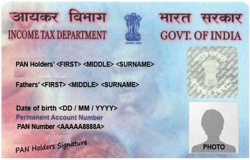

In [6]:
original

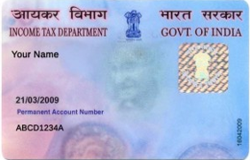

In [7]:
tampered

In [8]:
#Loading Images using cv2

original = cv2.imread('pan_card_tempering/image/original.png')
tampered = cv2.imread('pan_card_tempering/image/tampered.png')

In [9]:
#Reading images in Grayscale for cv2

gray_og = cv2.imread('pan_card_tempering/image/original.png',0)
gray_tamp = cv2.imread('pan_card_tempering/image/tampered.png',0)

In [10]:
(score, diff) = structural_similarity(gray_og,gray_tamp,full= True)
diff = (diff * 255).astype("uint8")
print('SSIM: {}'.format(score))

SSIM: 0.3168525722863691


##### SSIM is very low, Original and Tampered image are just 31% simmilar to each other.

In [11]:
# Calculating Threshold and Contours

thres = cv2.threshold(diff,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [12]:
# Creating a bounding rectangle

for c in cnts:
    #applying contours on image
    (x,y,w,h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x,y), (x+w, y+h),( 0, 0, 255), 2)
    cv2.rectangle(tampered, (x,y), (x+w, y+h),( 0, 0, 255), 2)

Original Format Image


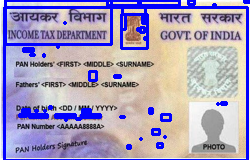

In [13]:
# Original Image with Contour

print('Original Format Image')
Image.fromarray(original)

Tampered Format Image


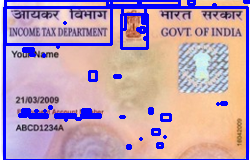

In [14]:
# Tampered Image with Contour

print('Tampered Format Image')
Image.fromarray(tampered)

Difference in Black


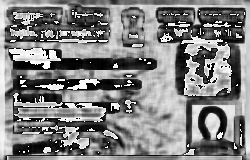

In [15]:
# Difference of images in Black

print('Difference in Black')
Image.fromarray(diff)
# BLACK area is the difference between the images.

Threshold in White


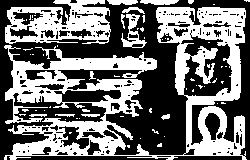

In [16]:
# Threshold of images in White

print('Threshold in White')
Image.fromarray(thres)
# White area is the Threshold of the image.

#### By looking at 
* SSIM score ( 31% ), 
* Original & Tampered Image with Contours,
* Difference & Threshold of Images.
#### I come to the conclusion that both images are dissimilar. 